In [19]:
# Setting up matplotlib
import matplotlib.pyplot as plt 
# Plots inside the notebook
%matplotlib inline 
# Sets the size of the figures:
plt.rcParams["figure.figsize"] = (5,5)

## Numpy and Scikit-Image 
import numpy as np
import skimage 
import skimage.data
import skimage.io 

Greyscale images are represented as 2D-Arrays. Values represent intensitivity levels 
from 0=black to 255=white. We may not see the intensity as well due to irrelevant things such as lighting and shadows. 

In [20]:
# Importing an image:
im = skimage.data.camera() # To read from file: skimage.io.imread("myimage.png")
print(im)
print(im.shape)
print(im.dtype)

[[200 200 200 ... 189 190 190]
 [200 199 199 ... 190 190 190]
 [199 199 199 ... 190 190 190]
 ...
 [ 25  25  27 ... 139 122 147]
 [ 25  25  26 ... 158 141 168]
 [ 25  25  27 ... 151 152 149]]
(512, 512)
uint8


Problem with utf8. Utf8 means one byte per pixel (values 0-255). Important is that these values wrap around. 

In [21]:
# Examples of wrap around: 
print(np.array([255],dtype="uint8")+1)
a = np.array([100],dtype="uint8")
print(a, a*2, a*3)

[0]
[100] [200] [44]


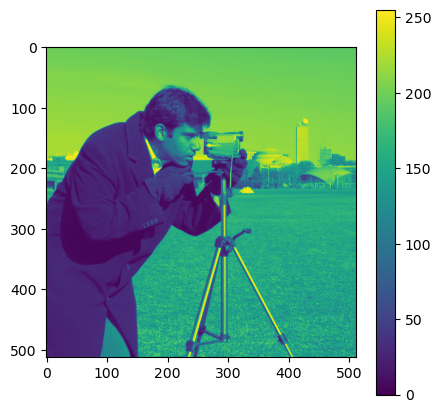

In [22]:
# Displaying Grey Scale images:
# Vmin and Vmax is used to set the colors to map to black and white
plt.imshow(im, vmin=0, vmax=255)
plt.colorbar()


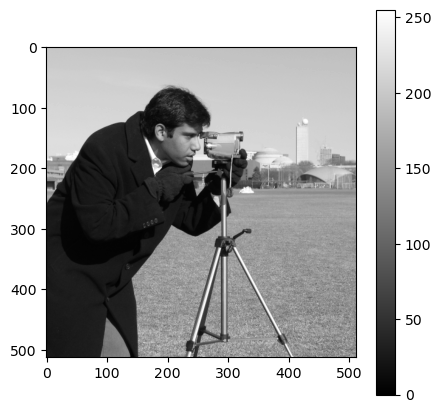

In [23]:
# Setting the colorscale to grey: 
plt.imshow(im, vmin=0, vmax=255, cmap="gray")
plt.colorbar();

Working with Floating Point Numbers: Use a range from (0) black and (255) for white, unless specificed differently. 

float64


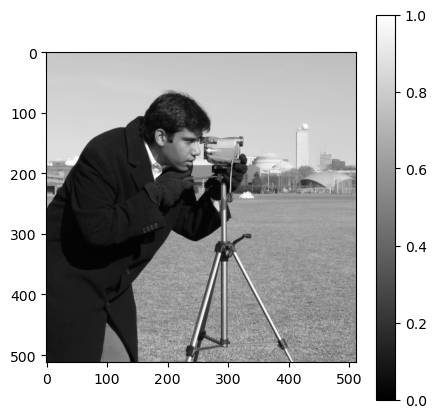

In [24]:
# Converting the image into floating point 
im_float = im/255 # 0 stays 0 and 255 becomes 1
print(im_float.dtype)
plt.imshow(im_float, cmap="gray", vmin=0, vmax=1)
plt.colorbar()

## Geometric Transformations 
1. Stacking transformation
2. Horizontal Stacking
3. Changing the contrast and the Brightness of the image

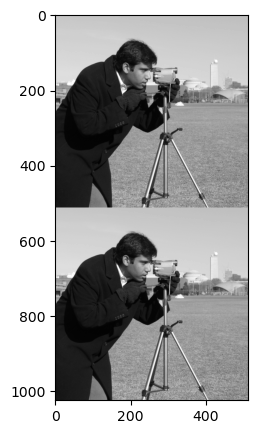

In [25]:
# This takes two copies of the image data im_float and stacks them vertically. 
plt.imshow(np.vstack((im_float, im_float)),
           cmap="gray", vmin=0, vmax=1);

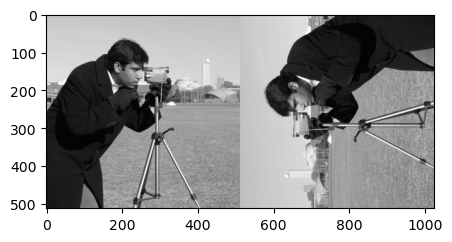

In [26]:
# This takes two times the same image and stacks them horizontally with one image
# being transposed: 
plt.imshow(np.hstack((im_float,im_float.T)), cmap="gray",vmin=0, vmax=1)


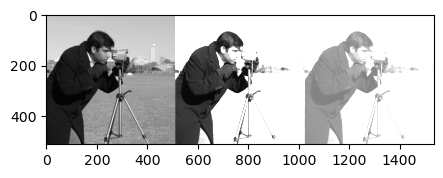

In [27]:
# Changing the contrast and brightness of the image 
plt.imshow(np.hstack((
                im_float,
                im_float * 2,   # changes  (Intensit of the image)
                im_float + 0.5  # changes brightness
           )), cmap="gray", vmin=0, vmax=1);

In [28]:
# Using a Slider instead only changing the brightness
import ipywidgets as ipw

@ipw.interact(brightness=ipw.FloatSlider(min=-1,max=+1))
def f(brightness):
    plt.imshow(np.hstack((
                im_float,
                im_float + brightness
           )), cmap="gray", vmin=0, vmax=1);

interactive(children=(FloatSlider(value=0.0, description='brightness', max=1.0, min=-1.0), Output()), _dom_cla…

In [29]:
# Using the slider to change contrast and brightness 
# Centers the image around 0 for contrast adjustment and reajusts, the brightness shifts the image
@ipw.interact(brightness=ipw.FloatSlider(min=-1, max=+1, value=0),
              contrast  =ipw.FloatSlider(min=-1, max=+3, value=1))
def f(brightness,contrast):
    plt.imshow(np.hstack((
        im_float,
        (im_float - 0.5) * contrast + 0.5 + brightness
    )),cmap="gray",vmin=0, vmax=1);

interactive(children=(FloatSlider(value=0.0, description='brightness', max=1.0, min=-1.0), FloatSlider(value=1…

Exercise 1: Read the grayscale image snoopy and write a simple code that generates an image:

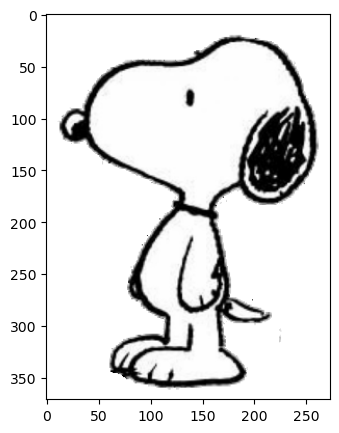

In [30]:
# Snoopy Image:
snoopy = skimage.io.imread("Data/snoopy.png")
plt.imshow(snoopy,cmap="gray",vmin=0,vmax=255)

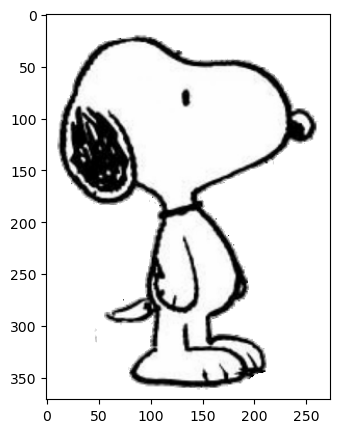

In [55]:
# Snoopy mirrored: 
plt.imshow(snoopy[:,::-1],cmap="gray",vmin=0,vmax=1)

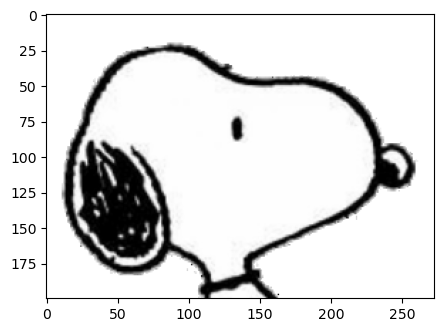

In [56]:
# Mirrored Snoopies head:
plt.imshow(snoopy[0:200,::-1],cmap="gray",vmax=1,vmin=0)

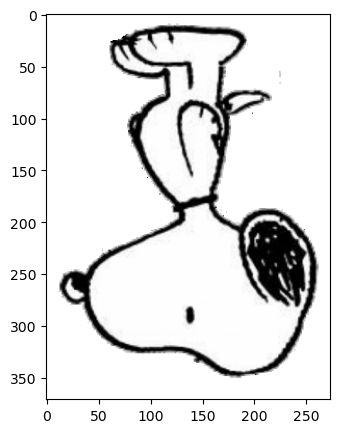

In [57]:
# Snoopy on his head:
plt.imshow(snoopy[::-1,:], cmap="gray",vmin=0,vmax=1)

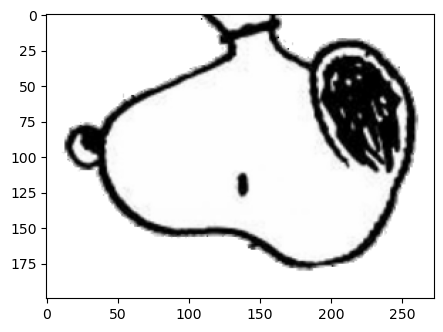

In [66]:
# Snoopies head on his head:
plt.imshow(snoopy[200:0:-1,:],vmax=1,vmin=0,cmap="gray")

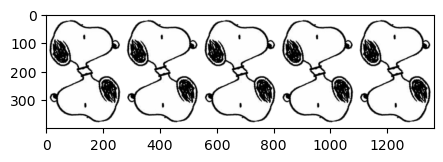

In [67]:
# Solution
im = skimage.io.imread("data/snoopy.png")
ims = []
for i in range(5):
    ims.append(np.vstack((
        im[:200,::-1],
        im[200:0:-1,:]
    )))
plt.imshow(np.hstack(ims),
           vmin=0, vmax=255, cmap="gray")

(371, 273)
uint8
float64


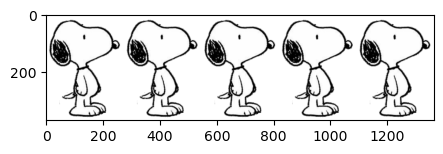

In [63]:
snoopy = skimage.io.imread("Data/snoopy.png")
print(snoopy.shape)
print(snoopy.dtype)
snoopy = snoopy/255
print(snoopy.dtype)
# Select all rows and use the resverse columns:
snoopy_mirrored = snoopy[:, ::-1]
ims = []

plt.imshow(snoopy_mirrored,cmap="gray",vmin=0,vmax=1)
for _ in range(5):
    ims.append(snoopy_mirrored)
# Hstack them 
plt.imshow(np.hstack((ims)),vmin=0, vmax=1, cmap="gray")

float64


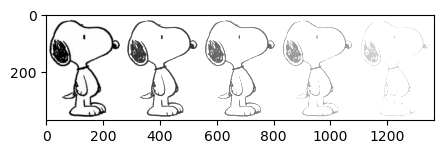

In [70]:
## Disappearing Snoopy
snoopy = skimage.io.imread("Data/snoopy.png")
snoopy = snoopy/255
print(snoopy.dtype)
ims = []

# Changes the brightness of snoopy 
for i in range(5):
    ims.append(snoopy[:,::-1] + i*0.2)
plt.imshow(np.hstack(ims),
           vmin=0, vmax=1, cmap="gray")